# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [7]:
!pip3 install yellowbrick
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 263 kB 409 kB/s eta 0:00:01
     |████████████████████████████████| 7.1 MB 380 kB/s eta 0:00:01


In [9]:
from sklearn import datasets
data = datasets.load_wine()
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [21]:
from sklearn.metrics import silhouette_score
from sklearn import cluster
kmeans=cluster.KMeans(n_clusters=8)
kmeans.fit(X)
y8_pred=kmeans.predict(X)
print ('K means 8 clusters:{}'.format(silhouette_score(X, y8_pred)))

K means 8 clusters:0.5357242180211081


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [22]:
kmeans=cluster.KMeans(n_clusters=5)
kmeans.fit(X)
y5_pred=kmeans.predict(X)
print ('K means 5 clusters:{}'.format(silhouette_score(X, y5_pred)))

K means 5 clusters:0.5489993239795691


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [23]:
kmeans=cluster.KMeans(n_clusters=3)
kmeans.fit(X)
y3_pred=kmeans.predict(X)
print ('K means 3 clusters:{}'.format(silhouette_score(X, y3_pred)))

K means 3 clusters:0.5711381937868844


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

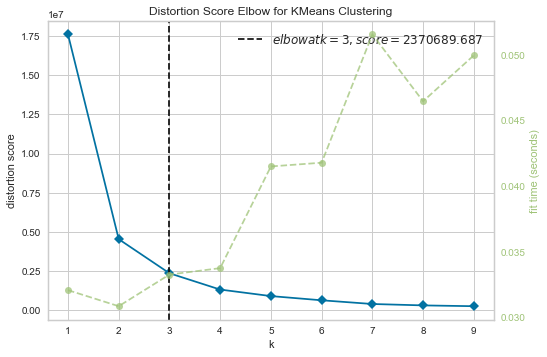

In [13]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
modelo=KMeans()
visual=KElbowVisualizer(modelo, k=(1,10))
visual.fit(X)
visual.poof();

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

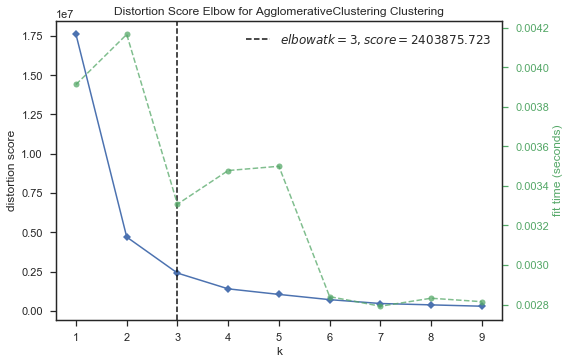

In [26]:
aggmodel=cluster.AgglomerativeClustering()
visual=KElbowVisualizer(aggmodel, k=(1,10))
visual.fit(X)
visual.poof();

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

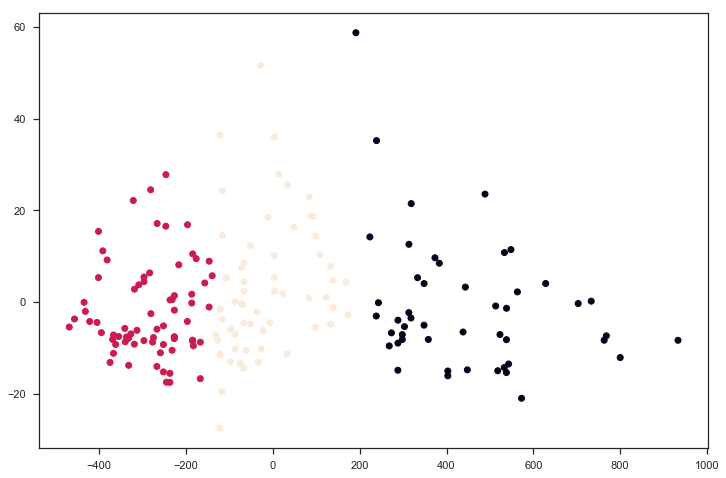

In [17]:
from sklearn.decomposition import PCA

pca=PCA(2).fit(newdf)
pca_x=pca.transform(newdf)
fig=plt.figure(figsize=(12,8))
ax = plt.subplot()
ax.scatter(pca_x[:,0], pca_x[:,1], c=newdf['labels']);

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

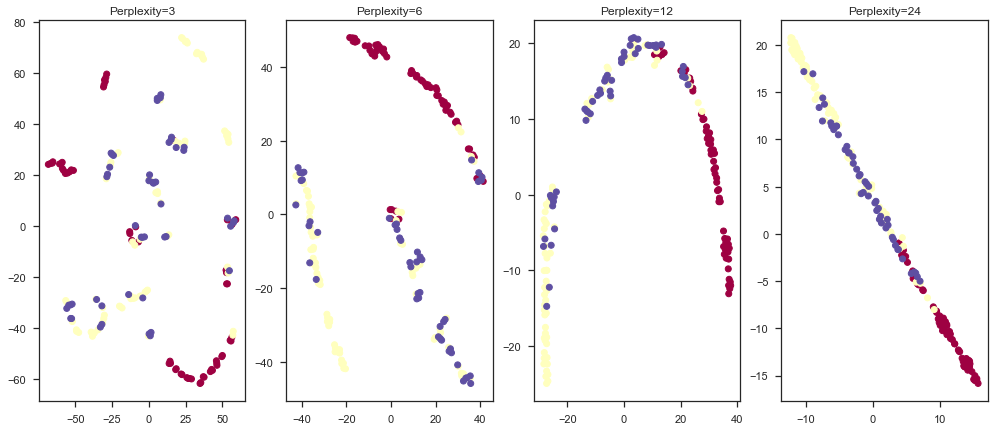

In [18]:
from sklearn.manifold import TSNE
fig, ax=plt.subplots(1, 4, figsize=(17,7))

for i, p in enumerate([3, 6, 12, 24]):
    tsne=TSNE(perplexity=p)
    x_emb=tsne.fit_transform(newdf)
    ax[i].scatter(x_emb[:,0], x_emb[:,1], c=y, cmap='Spectral')
    ax[i].set_title('Perplexity={}'.format(p))
    
plt.show();